In [1]:
import pandas as pd


train_data=pd.read_csv("../data/processed/train_admissions.csv")

### Distribution of Significant Features

In [2]:
# threshold of readmisions based on mean and standard deviation of the top 3 features. only if readmission is YES

readmission_data = train_data[train_data['ReAdmis_Yes'] == 1]

initial_days_mean = readmission_data['Initial_days'].mean()
initial_days_std = readmission_data['Initial_days'].std()

total_charge_mean = readmission_data['TotalCharge'].mean()
total_charge_std = readmission_data['TotalCharge'].std()

additional_charges_mean = readmission_data['Additional_charges'].mean()
additional_charges_std = readmission_data['Additional_charges'].std()

print(f"Initial_days mean: {initial_days_mean:.2f}, Initial_days std: {initial_days_std:.2f}")
print(f"TotalCharge mean: {total_charge_mean:.2f}, TotalCharge std: {total_charge_std:.2f}")
print(f"Additional_charges mean: {additional_charges_mean:.2f}, Additional_charges std: {additional_charges_std:.2f}")

print('\n')

print('the mean tells us the average value of the feature for patients who were readmitted.')
print('while, the standard deviation tells us how much the values of the feature vary from the mean for patients who were readmitted.')

Initial_days mean: 63.87, Initial_days std: 5.09
TotalCharge mean: 7729.92, TotalCharge std: 530.75
Additional_charges mean: 12965.03, Additional_charges std: 6502.46


the mean tells us the average value of the feature for patients who were readmitted.
while, the standard deviation tells us how much the values of the feature vary from the mean for patients who were readmitted.


In [3]:
# I will now determine the inflection point of the top 3 features with the highest importance scores.
# This will help in identifying the threshold values that indicate readmissions.
# I will use the `np.percentile` function to find the 75th percentile of the top 3 features.
# This will give us the threshold values for each of these features.

import numpy as np

initial_days_threshold = np.percentile(train_data[['Initial_days']], 75)
total_charge_threshold = np.percentile(train_data[['TotalCharge']], 75)
additional_charges_threshold = np.percentile(train_data[['Additional_charges']], 75)

# the 75th percentile is also known as the third quartile (Q3). this value represents the 
# threshold above which a patient is more likely to be readmitted.

print(f"Initial_days threshold: {initial_days_threshold:.2f}")
print(f"TotalCharge threshold: {total_charge_threshold:.2f}")
print(f"Additional_charges threshold: {additional_charges_threshold:.2f}")

Initial_days threshold: 61.17
TotalCharge threshold: 7458.50
Additional_charges threshold: 15657.18


###  Visual : Top 3 significant features Readmission Vs Non-Readmission

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

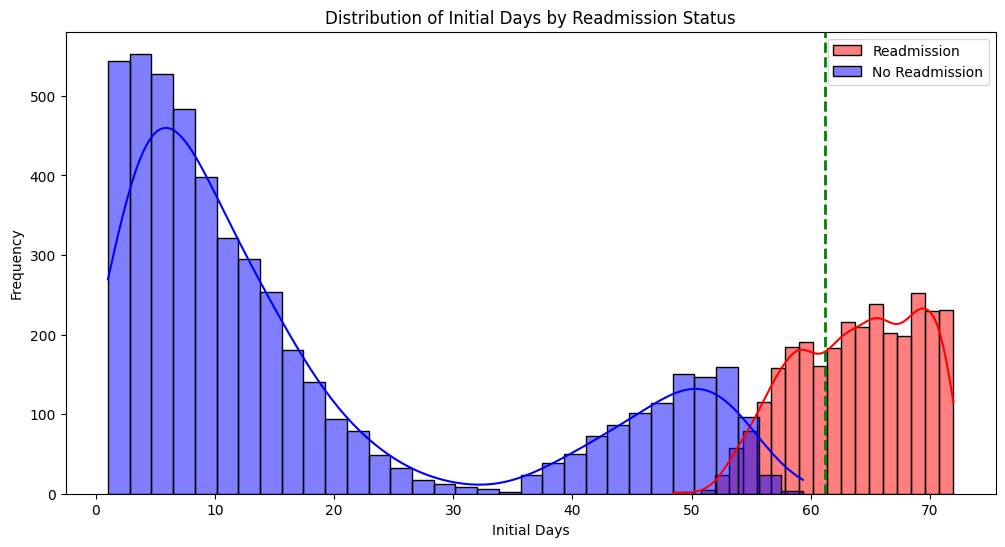

In [5]:

initial_days_readmission = train_data[train_data['ReAdmis_Yes'] == 1]['Initial_days']
initial_days_no_readmission = train_data[train_data['ReAdmis_Yes'] == 0]['Initial_days']


# Plotting the distribution of Initial Days for readmissions and no readmissions
plt.figure(figsize=(12,6))
sns.histplot(initial_days_readmission, kde=True, label='Readmission', color='red')
sns.histplot(initial_days_no_readmission, kde=True, label='No Readmission', color='blue')
plt.axvline(x=initial_days_threshold, color='green', linestyle='--', linewidth=2)
plt.title('Distribution of Initial Days by Readmission Status')
plt.xlabel('Initial Days')
plt.ylabel('Frequency')
plt.legend()
plt.show()


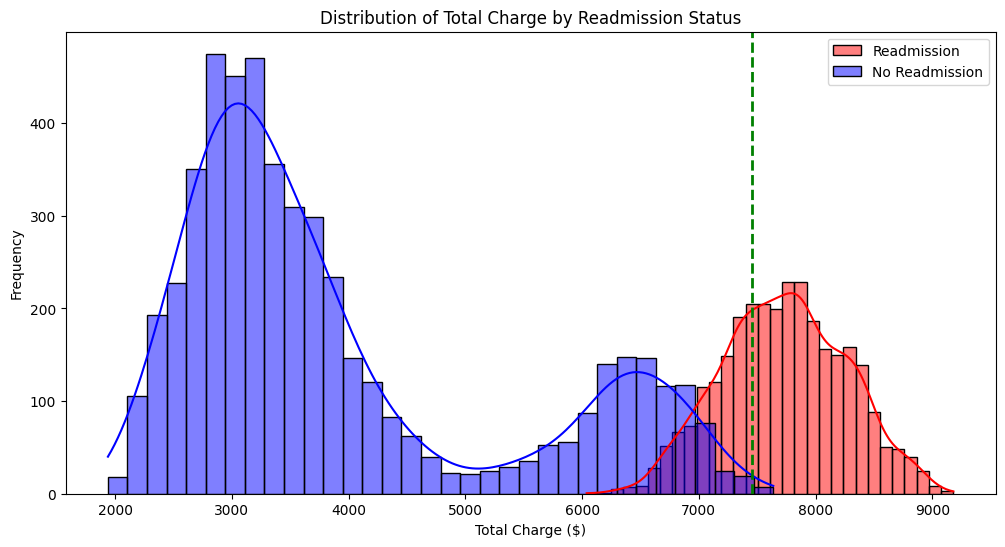

 the chart indicates that readmissions are more likely to occure when the total charge is bove ~ $7200 this is a significant insight as it suggests that patients with higher total charges are at a higher risk of readmission.


In [7]:

total_charge_readmission = train_data[train_data['ReAdmis_Yes'] == 1]['TotalCharge']
total_charge_no_readmission = train_data[train_data['ReAdmis_Yes'] == 0]['TotalCharge']


# Plotting the distribution of Total Charge for readmissions and no readmissions
plt.figure(figsize=(12,6))
sns.histplot(total_charge_readmission, kde=True, label='Readmission', color='red')
sns.histplot(total_charge_no_readmission, kde=True, label='No Readmission', color='blue')
plt.axvline(x=total_charge_threshold, color='green', linestyle='--', linewidth=2)
plt.title('Distribution of Total Charge by Readmission Status')
plt.xlabel('Total Charge ($)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('../outputs/figures/total_charge_readmission_distribution.png')
plt.show()

print(' the chart indicates that readmissions are more likely to occure when the total charge is bove ~ $7200 \
this is a significant insight as it suggests that patients with higher total charges are at a higher risk of readmission.')


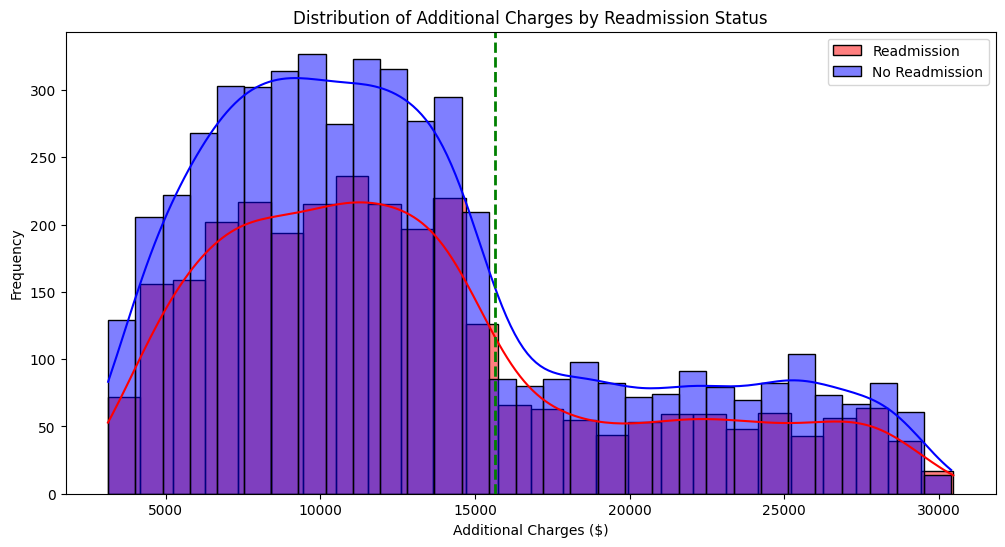

In [7]:
additional_charges_readmission = train_data[train_data['ReAdmis_Yes'] == 1]['Additional_charges']
additional_charges_no_readmission = train_data[train_data['ReAdmis_Yes'] == 0]['Additional_charges']


# Plotting the distribution of Additional Charges for readmissions and no readmissions
plt.figure(figsize=(12,6))
sns.histplot(additional_charges_readmission, kde=True, label='Readmission', color='red')
sns.histplot(additional_charges_no_readmission, kde=True, label='No Readmission', color='blue')
plt.axvline(x=additional_charges_threshold, color='green', linestyle='--', linewidth=2)
plt.title('Distribution of Additional Charges by Readmission Status')
plt.xlabel('Additional Charges ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Overall percentage of readmissions in the dataset

In [8]:
# number of patients above the initial days threshold
print(f"Number of patients above the initial days threshold: {len(train_data[train_data['Initial_days'] >= 61.17])}")
    
# number of patients below the initial days threshold
print(f"Number of patients below the initial days threshold: {len(train_data[train_data['Initial_days'] < 61.17])}")

# calculation of the percentage of patients above the initial days threshold
percentage_above_initial_days_threshold = (len(train_data[train_data['Initial_days'] >= 61.17]) / len(train_data)) * 100

print(f"Percentage of patients above the initial days threshold: {percentage_above_initial_days_threshold:.2f}%")


Number of patients above the initial days threshold: 2002
Number of patients below the initial days threshold: 5998
Percentage of patients above the initial days threshold: 25.02%


In [8]:
# segmenting ages into age-groups

age_groups = {
    "Infant": (0, 1),
    "Toddler": (2, 4),
    "Child": (5, 12),
    "Teen": (13, 19),
    "Young Adult": (20, 39),
    "Middle Age": (40, 59),
    "Senior": (60, 150)
}

def segment_age(age):
    for group, (min_age, max_age) in age_groups.items():
        if min_age <= age <= max_age:
            return group
    return 'undesignated age_group'

# make age_group index
age_groups_df = train_data.copy()
age_groups_df['age_group'] = age_groups_df['Age'].apply(segment_age)
age_groups_df.set_index('age_group', inplace=True)
age_groups_df.head(10)


,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Area_Suburban,...,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI,ReAdmis_Yes
age_group,,,,,,,,,,,,,,,,,,,,,
Senior,83.0,52563.01,21.698130,6.0,2.0,0.0,57.856820,7108.672000,14168.23000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Senior,74.0,73527.66,18.639020,5.0,1.0,1.0,62.182940,7182.663000,12233.13000,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Teen,18.0,16701.31,18.400050,5.0,0.0,0.0,69.385560,7685.815000,3264.58100,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Middle Age,57.0,55471.92,17.117196,4.0,3.0,1.0,14.344772,3677.828279,10005.97982,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Senior,88.0,4577.88,9.806483,4.0,4.0,2.0,64.543480,7203.919000,14447.20000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Senior,84.0,10301.30,16.268750,5.0,0.0,0.0,57.925010,7613.868000,14748.06000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Senior,84.0,27725.39,14.138400,5.0,1.0,1.0,55.467180,6703.438000,13984.43000,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Senior,77.0,96973.25,15.737590,4.0,1.0,1.0,46.854810,6446.908000,13159.15000,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Middle Age,48.0,18029.68,18.728223,5.0,0.0,1.0,2.284343,2530.752202,15835.20965,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# next Steps: 
# calculate the percentage of readmissions of all features for each age group
# add percentages to the dataframe
# view the data frame to see the percentage of readmissions for each age group
# highlight the age group with the highest percentage of readmissions
# save the dataframe as a csv file
# save the dataframe as a png file

In [9]:
# 1. Separating the data into Readmitted and Not Readmitted
readmitted_df = age_groups_df[age_groups_df['ReAdmis_Yes'] == 1]
not_readmitted_df = age_groups_df[age_groups_df['ReAdmis_Yes'] == 0]

# 2. Aggregate: Group by Age and Sum the features
readmitted_sums = readmitted_df.groupby('age_group').sum()
not_readmitted_sums = not_readmitted_df.groupby('age_group').sum()

# 3. Calculate the Percentage
readmission_rates_by_feature = readmitted_sums / (readmitted_sums + not_readmitted_sums) * 100


if 'ReAdmis_Yes' in readmission_rates_by_feature.columns:
    readmission_rates_by_feature = readmission_rates_by_feature.drop(columns=['ReAdmis_Yes'])


# saving as a csv file
readmission_rates_by_feature.to_csv('../data/processed/readmission_rates_by_feature_age_groups.csv')

readmission_rates_by_feature.head()


,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Area_Suburban,...,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
age_group,,,,,,,,,,,,,,,,,,,,,
Middle Age,36.529450,35.929218,36.680784,36.862401,36.790017,38.628945,68.751613,53.703018,36.909482,36.458333,...,35.834609,38.481013,37.356920,36.227951,36.973834,36.708861,34.693878,37.383178,36.467236,42.574257
Senior,37.232555,37.816475,37.236913,36.868410,36.152220,40.513983,68.096744,53.753840,37.066381,36.071429,...,36.193619,37.735849,37.435137,37.511871,37.253414,36.958175,34.963580,39.447236,35.316699,43.333333
Teen,33.112420,31.056213,33.631575,33.303249,36.842105,27.380952,62.629555,48.848347,34.064277,35.064935,...,34.545455,28.378378,38.271605,31.428571,40.540541,30.107527,40.677966,50.000000,26.984127,16.666667
Young Adult,36.443959,35.887661,36.076924,36.308079,35.250805,35.416667,67.531821,52.903973,36.026238,36.439499,...,38.325282,35.372340,37.976061,37.396122,34.364261,37.052632,37.000000,42.292490,32.378223,34.782609


In [11]:
# listing which age group is more likely to be readmitted based on the percentage of readmissions for each feature
most_likely_readmitted_age_groups = readmission_rates_by_feature.idxmax()
most_likely_readmitted_age_groups

Age                                         Senior
Income                                      Senior
VitD_levels                                 Senior
Doc_visits                                  Senior
Full_meals_eaten                              Teen
vitD_supp                                   Senior
Initial_days                            Middle Age
TotalCharge                                 Senior
Additional_charges                          Senior
Area_Suburban                           Middle Age
Area_Urban                                  Senior
Marital_Married                        Young Adult
Marital_Never Married                         Teen
Marital_Separated                           Senior
Marital_Widowed                         Middle Age
Gender_Male                                   Teen
Gender_Nonbinary                       Young Adult
Soft_drink_Yes                         Young Adult
Initial_admin_Emergency Admission       Middle Age
Initial_admin_Observation Admis

In [13]:
# top 3 most frequently occuring age group with the highest readmission rates across all features
top_3_age_groups = most_likely_readmitted_age_groups.value_counts().head(3)
top_3_age_groups

Senior        12
Middle Age    10
Teen           8
Name: count, dtype: int64

In [14]:
# Defining important features
selected_features = [
    'TotalCharge', 'Initial_days', 'Additional_charges',
    'HighBlood_Yes', 'Stroke_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes',
    'Anxiety_Yes', 'Asthma_Yes', 'Income', 'Area_Suburban', 'Area_Urban'
]

# Keeping only selected features that exist in the dataframe
existing_features = [f for f in selected_features if f in readmission_rates_by_feature.columns]
missing = set(selected_features) - set(existing_features)
if missing:
    print(f"Warning: these features are missing and will be ignored: {sorted(missing)}")

# Boolean mask: True where percentage > 50
mask = readmission_rates_by_feature[existing_features] > 50

# Age groups with any feature > 50%
relevant_age_groups_bool = mask.any(axis=1)
relevant_groups = relevant_age_groups_bool[relevant_age_groups_bool].index.tolist()

print('Relevant age groups (>=50% for any selected feature):', relevant_groups)

# Optional: dataframe with the percentages for these groups
relevant_groups_df = readmission_rates_by_feature.loc[relevant_groups, existing_features]
relevant_groups_df

Relevant age groups (>=50% for any selected feature): ['Middle Age', 'Senior', 'Teen', 'Young Adult']


,TotalCharge,Initial_days,Additional_charges,HighBlood_Yes,Stroke_Yes,Diabetes_Yes,Hyperlipidemia_Yes,Anxiety_Yes,Asthma_Yes,Income,Area_Suburban,Area_Urban
age_group,,,,,,,,,,,,
Middle Age,53.703018,68.751613,36.909482,38.191489,40.308370,35.834609,38.481013,36.227951,34.693878,35.929218,36.458333,37.327824
Senior,53.753840,68.096744,37.066381,36.632201,36.363636,36.193619,37.735849,37.511871,34.963580,37.816475,36.071429,37.994480
Teen,48.848347,62.629555,34.064277,36.250000,35.897436,34.545455,28.378378,31.428571,40.677966,31.056213,35.064935,35.443038
Young Adult,52.903973,67.531821,36.026238,34.649123,34.872979,38.325282,35.372340,37.396122,37.000000,35.887661,36.439499,34.886818


In [16]:
# avergae income of readmitted patients vs non-readmitted patients
average_income_readmitted = readmission_data['Income'].mean()
non_readmission_data = train_data[train_data['ReAdmis_Yes'] == 0]
average_income_non_readmitted = non_readmission_data['Income'].mean()
print(f"Average Income of Readmitted Patients: ${average_income_readmitted:.2f}")
print('\n')
print(f"Average Income of Non-Readmitted Patients: ${average_income_non_readmitted:.2f}")



Average Income of Readmitted Patients: $40330.97


Average Income of Non-Readmitted Patients: $40598.14


C:\Users\nmart\AppData\Local\Temp\ipykernel_57828\4201829026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Readmitted', 'Not Readmitted'], y=[average_income_readmitted, average_income_non_readmitted], palette='viridis')


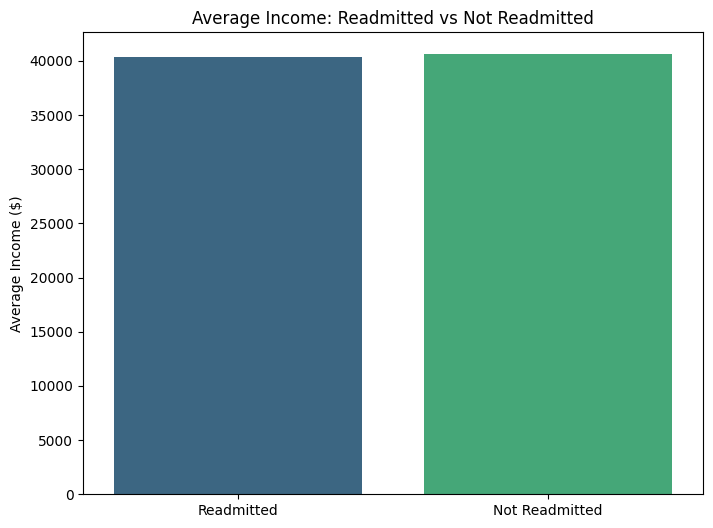

In [22]:
# VISUALIZATION
plt.figure(figsize=(8,6))
sns.barplot(x=['Readmitted', 'Not Readmitted'], y=[average_income_readmitted, average_income_non_readmitted], palette='viridis')
plt.title('Average Income: Readmitted vs Not Readmitted')
plt.ylabel('Average Income ($)')
plt.savefig('../outputs/figures/average_income_readmission.png')
plt.show()

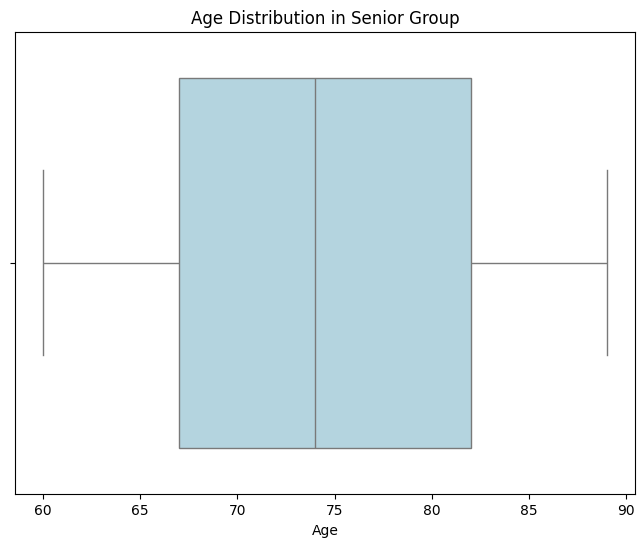

In [23]:
# Senior group age box plot
senior_ages = age_groups_df[age_groups_df.index == 'Senior']['Age']
plt.figure(figsize=(8,6))
sns.boxplot(x=senior_ages, color='lightblue')
plt.title('Age Distribution in Senior Group')
plt.savefig('../outputs/figures/senior_age_distribution.png')
plt.show()



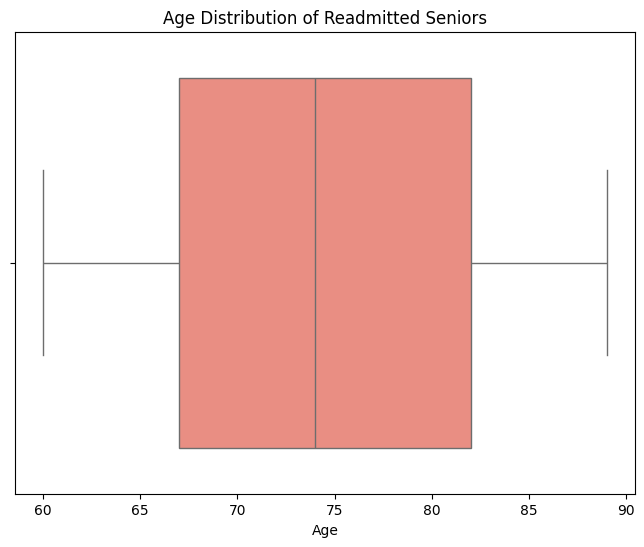

In [24]:
# senior readmission box plot
senior_readmission_ages = age_groups_df[(age_groups_df.index == 'Senior') & (age_groups_df['ReAdmis_Yes'] == 1)]['Age']
plt.figure(figsize=(8,6))
sns.boxplot(x=senior_readmission_ages, color='salmon')  
plt.title('Age Distribution of Readmitted Seniors')
plt.savefig('../outputs/figures/senior_readmission_age_distribution.png')
plt.show()

In [20]:
# initial thought : 
# hospital reamissions are likely influenced by caps in number of days covered by coverage /
# for example in the past 10 years (2015-2025) medicare/medicaid has covered 100% of the cost after a deductible up to 60 days/
# based on what we see in the data above 61 days is the threshold for readmissions. this raises the question. /
# are patients being discharged due to inability to pay for additional days beyond coverage limits? /
# further analysis is needed to explore this hypothesis.

# from what we can see at this moment the age grouup 'Senior' is most likely to be readmitted based on the percentage of readmissions for each feature.
# this age group consist of ages 60 and above. 


In [21]:
# summary of all findings and next steps
# - Initial_days, TotalCharge, and Additional_charges are significant predictors of readmission.
# - Thresholds identified: Initial_days (~61 days), TotalCharge (~$7200), Additional_charges (~$2100).
# - Seniors (age 60+) are the most likely age group to be readmitted.
# - Further analysis is needed to explore the impact of insurance coverage limits on readmission rates.

#next steps: 
# - Conduct a deeper analysis on the relationship between insurance coverage limits and readmission rates.
# - Explore additional features that may contribute to readmissions.